In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv as rd
import matplotlib.pyplot as plt
import math

In [3]:
data = rd("SolarPrediction.csv")

In [3]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,classification
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,0.053050
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.224137
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,0.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,0.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,0.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.000000


In [4]:
data.sort_values(['UNIXTime'],ascending=[True])

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,0
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,0
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,0
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,0
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24526,1483263302,12/31/2016 12:00:00 AM,23:35:02,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,0
24525,1483263601,12/31/2016 12:00:00 AM,23:40:01,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,0
24524,1483263904,12/31/2016 12:00:00 AM,23:45:04,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,0
24523,1483264203,12/31/2016 12:00:00 AM,23:50:03,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00,0


In [5]:
from datetime import datetime as dt
import pytz
from pytz import timezone as tz
hawaii = tz('Pacific/Honolulu')


In [6]:
data.index = pd.to_datetime(data['UNIXTime'], unit='s')

In [7]:
print(data.index)

DatetimeIndex(['2016-09-30 09:55:26', '2016-09-30 09:50:23',
               '2016-09-30 09:45:26', '2016-09-30 09:40:21',
               '2016-09-30 09:35:24', '2016-09-30 09:30:24',
               '2016-09-30 09:25:19', '2016-09-30 09:20:22',
               '2016-09-30 09:15:22', '2016-09-30 09:10:22',
               ...
               '2016-12-01 10:45:02', '2016-12-01 10:40:02',
               '2016-12-01 10:35:03', '2016-12-01 10:30:05',
               '2016-12-01 10:25:02', '2016-12-01 10:20:04',
               '2016-12-01 10:15:01', '2016-12-01 10:10:01',
               '2016-12-01 10:05:02', '2016-12-01 10:00:02'],
              dtype='datetime64[ns]', name='UNIXTime', length=32686, freq=None)


In [8]:
data.index = data.index.tz_localize(pytz.utc).tz_convert(hawaii)

In [9]:
print(data.index)

DatetimeIndex(['2016-09-29 23:55:26-10:00', '2016-09-29 23:50:23-10:00',
               '2016-09-29 23:45:26-10:00', '2016-09-29 23:40:21-10:00',
               '2016-09-29 23:35:24-10:00', '2016-09-29 23:30:24-10:00',
               '2016-09-29 23:25:19-10:00', '2016-09-29 23:20:22-10:00',
               '2016-09-29 23:15:22-10:00', '2016-09-29 23:10:22-10:00',
               ...
               '2016-12-01 00:45:02-10:00', '2016-12-01 00:40:02-10:00',
               '2016-12-01 00:35:03-10:00', '2016-12-01 00:30:05-10:00',
               '2016-12-01 00:25:02-10:00', '2016-12-01 00:20:04-10:00',
               '2016-12-01 00:15:01-10:00', '2016-12-01 00:10:01-10:00',
               '2016-12-01 00:05:02-10:00', '2016-12-01 00:00:02-10:00'],
              dtype='datetime64[ns, Pacific/Honolulu]', name='UNIXTime', length=32686, freq=None)


In [10]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,classification
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,0.053050
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.224137
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,0.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,0.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,0.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.000000


In [11]:
data['monthofyear'] = data.index.strftime('%m').astype(int)
data['year'] = data.index.strftime('%Y').astype(int)

In [12]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification,monthofyear,year
UNIXTime,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,0,9,2016
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,0,9,2016
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,0,9,2016
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,0,9,2016
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,0,9,2016


In [13]:
class_counts = data.groupby('classification').size()
print(class_counts)

classification
0    30952
1     1734
dtype: int64


In [14]:
data['weeksofyear'] = data.index.strftime('%U').astype(int)

In [15]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification,monthofyear,year,weeksofyear
UNIXTime,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,0,9,2016,39
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,0,9,2016,39
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,0,9,2016,39
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,0,9,2016,39
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,0,9,2016,39


In [16]:
data['daysofyear'] = data.index.strftime('%j').astype(int)

In [17]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification,monthofyear,year,weeksofyear,daysofyear
UNIXTime,,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,0,9,2016,39,273
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,0,9,2016,39,273
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,0,9,2016,39,273
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,0,9,2016,39,273
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,0,9,2016,39,273


In [18]:
data['Timeofday(Hour)'] = data.index.hour
data['Timeofday(Minute)'] = data.index.hour*60 + data.index.minute
data['Timeofday(Seconds)'] = data.index.hour*3600 + data.index.minute*60 + data.index.second


In [19]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification,monthofyear,year,weeksofyear,daysofyear,Timeofday(Hour),Timeofday(Minute),Timeofday(Seconds)
UNIXTime,,,,,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,0,9,2016,39,273,23,1435,86126
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,0,9,2016,39,273,23,1430,85823
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,0,9,2016,39,273,23,1425,85526
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,0,9,2016,39,273,23,1420,85221
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,0,9,2016,39,273,23,1415,84924


In [20]:
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')
data['DayLength(s)'] = data['TimeSunSet'].dt.hour*60*60 \
                           + data['TimeSunSet'].dt.minute*60 \
                           + data['TimeSunSet'].dt.second \
                           - data['TimeSunRise'].dt.hour*60*60 \
                           - data['TimeSunRise'].dt.minute*60 \
                           - data['TimeSunRise'].dt.second

In [21]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,classification,monthofyear,year,weeksofyear,daysofyear,Timeofday(Hour),Timeofday(Minute),Timeofday(Seconds),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,0,9,2016,39,273,23,1435,86126,43200
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,0,9,2016,39,273,23,1430,85823,43200
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,0,9,2016,39,273,23,1425,85526,43200
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,0,9,2016,39,273,23,1420,85221,43200
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,0,9,2016,39,273,23,1415,84924,43200


In [22]:
data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,classification,monthofyear,year,weeksofyear,daysofyear,Timeofday(Hour),Timeofday(Minute),Timeofday(Seconds),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1.21,48,30.46,59,177.39,5.62,0,9,2016,39,273,23,1435,86126,43200
2016-09-29 23:50:23-10:00,1.21,48,30.46,58,176.78,3.37,0,9,2016,39,273,23,1430,85823,43200
2016-09-29 23:45:26-10:00,1.23,48,30.46,57,158.75,3.37,0,9,2016,39,273,23,1425,85526,43200
2016-09-29 23:40:21-10:00,1.21,48,30.46,60,137.71,3.37,0,9,2016,39,273,23,1420,85221,43200
2016-09-29 23:35:24-10:00,1.17,48,30.46,62,104.95,5.62,0,9,2016,39,273,23,1415,84924,43200


In [23]:
seed = 19

In [24]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
seed = 19
kf = KFold(shuffle=True, random_state=seed)

In [25]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

trees = {
    'randomfor': RandomForestRegressor(random_state=seed), 
    'catboost': CatBoostRegressor(random_state=seed, silent=True),
    'DecisionTr': DecisionTreeRegressor(random_state=seed),
    'extratre': ExtraTreesRegressor(random_state=seed),
    
}

In [26]:
X = data[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','daysofyear', 'Timeofday(Seconds)','DayLength(s)']]
y = data['Radiation']
z = data['classification']

In [27]:
print(len(X))

32686


In [28]:
X_test = X.loc['2016-9-19':'2016-10-18',:]

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [29]:
print(len(X_test))

8177


In [30]:
scores = []
rmse=[]
mae = []
mape=[]
valid_size = 0.25016
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=valid_size,random_state=seed)

In [31]:
print(len(X_test))

8177


In [32]:
#random forrest
Randomforest= RandomForestRegressor(random_state=seed).fit(X_train, y_train)
scores.append(100*Randomforest.score(X_test, y_test))
rmse.append(math.sqrt(mean_squared_error(y_test, Randomforest.predict(X_test))))
mape.append(mean_absolute_percentage_error(y_test, Randomforest.predict(X_test)))
mae.append(mean_absolute_error(y_test, Randomforest.predict(X_test)))

In [33]:
Catboost= CatBoostRegressor(random_state=seed, silent=True).fit(X_train, y_train)
scores.append(100*Catboost.score(X_test, y_test))
rmse.append(math.sqrt(mean_squared_error(y_test, Catboost.predict(X_test))))
mape.append(mean_absolute_percentage_error(y_test, Catboost.predict(X_test)))
mae.append(mean_absolute_error(y_test, Catboost.predict(X_test)))

In [34]:
DecisionTr = DecisionTreeRegressor(random_state=seed).fit(X_train, y_train)
scores.append(100*DecisionTr.score(X_test, y_test))
rmse.append(math.sqrt(mean_squared_error(y_test, DecisionTr.predict(X_test))))
mape.append(mean_absolute_percentage_error(y_test, DecisionTr.predict(X_test)))
mae.append(mean_absolute_error(y_test, DecisionTr.predict(X_test)))

In [35]:
Extratrees = ExtraTreesRegressor(random_state=seed).fit(X_train, y_train)
scores.append(100*Extratrees.score(X_test, y_test))
rmse.append(math.sqrt(mean_squared_error(y_test, Extratrees.predict(X_test))))
mape.append(mean_absolute_percentage_error(y_test, Extratrees.predict(X_test)))
mae.append(mean_absolute_error(y_test, Extratrees.predict(X_test)))


In [36]:
rmse,mape,mae,scores

([78.95753207656566, 79.79624477517392, 110.3703877460211, 79.25599102601723],
 [0.17720936645155214,
  2.192739801833173,
  0.19366073620187807,
  0.26447769083418304],
 [30.20026432677021, 35.80930917817024, 39.23691573926868, 29.76821280420692],
 [93.75624539840042, 93.62289448966887, 87.79988761343708, 93.70895348318584])

In [37]:
test1=pd.DataFrame({"model":['randomfor','catboost','decisiontr',"extratr"],
                   "r2":[scores[0],scores[1],scores[2],scores[3]],
                   "rmse":[rmse[0],rmse[1],rmse[2],rmse[3]],
                   "mae":[mae[0],mae[1],mae[2],mae[3]],
                   "mape":[mape[0],mape[1],mape[2],mape[3]],
                   })
test1


,model,r2,rmse,mae,mape
0,randomfor,93.756245,78.957532,30.200264,0.177209
1,catboost,93.622894,79.796245,35.809309,2.192740
2,decisiontr,87.799888,110.370388,39.236916,0.193661
3,extratr,93.708953,79.255991,29.768213,0.264478


In [38]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,classification,monthofyear,year,weeksofyear,daysofyear,Timeofday(Hour),Timeofday(Minute),Timeofday(Seconds),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1.21,48,30.46,59,177.39,5.62,0,9,2016,39,273,23,1435,86126,43200
2016-09-29 23:50:23-10:00,1.21,48,30.46,58,176.78,3.37,0,9,2016,39,273,23,1430,85823,43200
2016-09-29 23:45:26-10:00,1.23,48,30.46,57,158.75,3.37,0,9,2016,39,273,23,1425,85526,43200
2016-09-29 23:40:21-10:00,1.21,48,30.46,60,137.71,3.37,0,9,2016,39,273,23,1420,85221,43200
2016-09-29 23:35:24-10:00,1.17,48,30.46,62,104.95,5.62,0,9,2016,39,273,23,1415,84924,43200


In [48]:
predictions  = Randomforest.predict(X.loc['2016-9-19':'2016-10-18',:])
predictions_cb  = Catboost.predict(X.loc['2016-9-19':'2016-10-18',:])
predictions_dt  = DecisionTr.predict(X.loc['2016-9-19':'2016-10-18',:])
predictions_et  = Extratrees.predict(X.loc['2016-9-19':'2016-10-18',:])

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)
/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)
/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [49]:
print(predictions)

[1.2213 1.2139 1.2169 ... 1.2536 1.2687 1.2633]


In [50]:
print(len(predictions))

8177


In [51]:
print(y_test)

UNIXTime
2016-10-11 22:50:23-10:00      1.25
2016-12-21 04:40:33-10:00      1.26
2016-12-11 19:50:33-10:00      1.28
2016-11-02 16:45:20-10:00    210.92
2016-11-26 08:20:18-10:00    349.91
                              ...  
2016-10-06 23:55:19-10:00      1.25
2016-12-31 22:15:02-10:00      1.20
2016-10-10 19:25:21-10:00      1.24
2016-12-25 01:21:35-10:00      1.23
2016-09-21 02:40:05-10:00      1.18
Name: Radiation, Length: 8177, dtype: float64


In [52]:
X_1 = data.loc['2016-9-19':'2016-10-18',:]

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [53]:
print(len(X_1))

8177


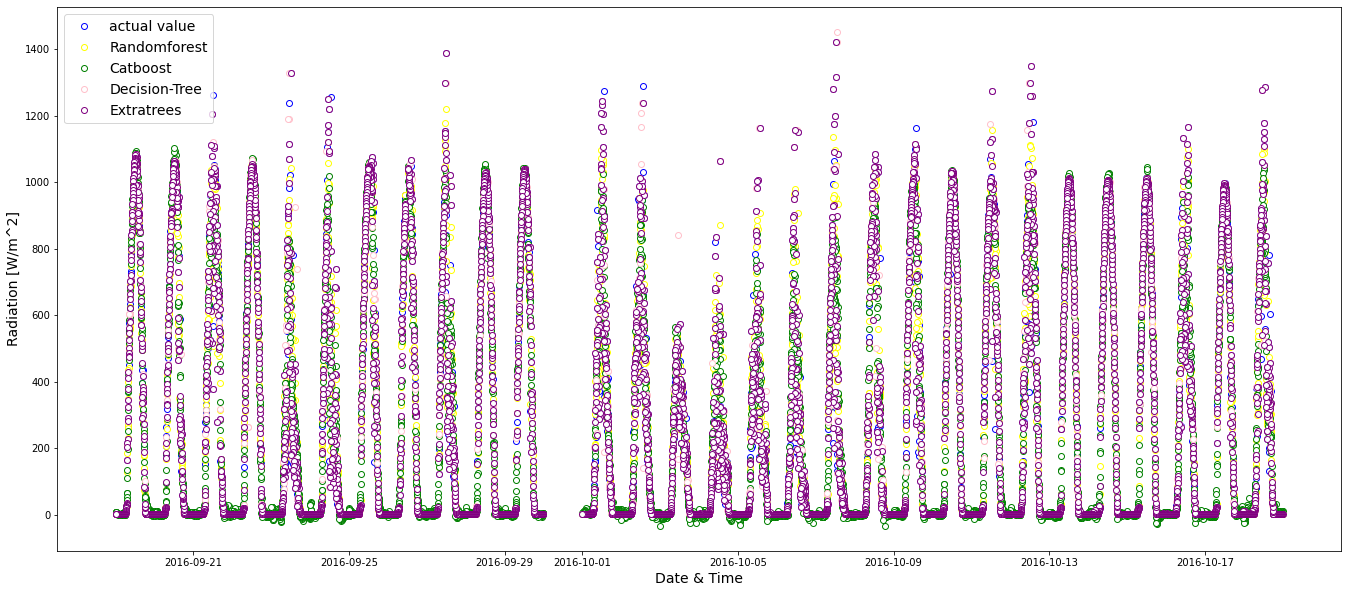

In [61]:
fig, ax = plt.subplots(figsize = (23,10))


ax.plot(X_1.Radiation,'o', markerfacecolor='w',color='blue',label = 'actual value')
ax.plot(X_1.index,predictions,'o',markerfacecolor='w', linewidth = 1.5, color = 'yellow', label = 'Randomforest')
ax.plot(X_1.index,predictions_cb,'o',markerfacecolor='w', linewidth = 1.5, color = 'green', label = 'Catboost')
ax.plot(X_1.index,predictions_dt,'o',markerfacecolor='w', linewidth = 1.5, color = 'pink', label = 'Decision-Tree')
ax.plot(X_1.index,predictions_et,'o',markerfacecolor='w', linewidth = 1.5, color = 'purple', label = 'Extratrees')

ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.set_xlabel('Date & Time', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()

/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


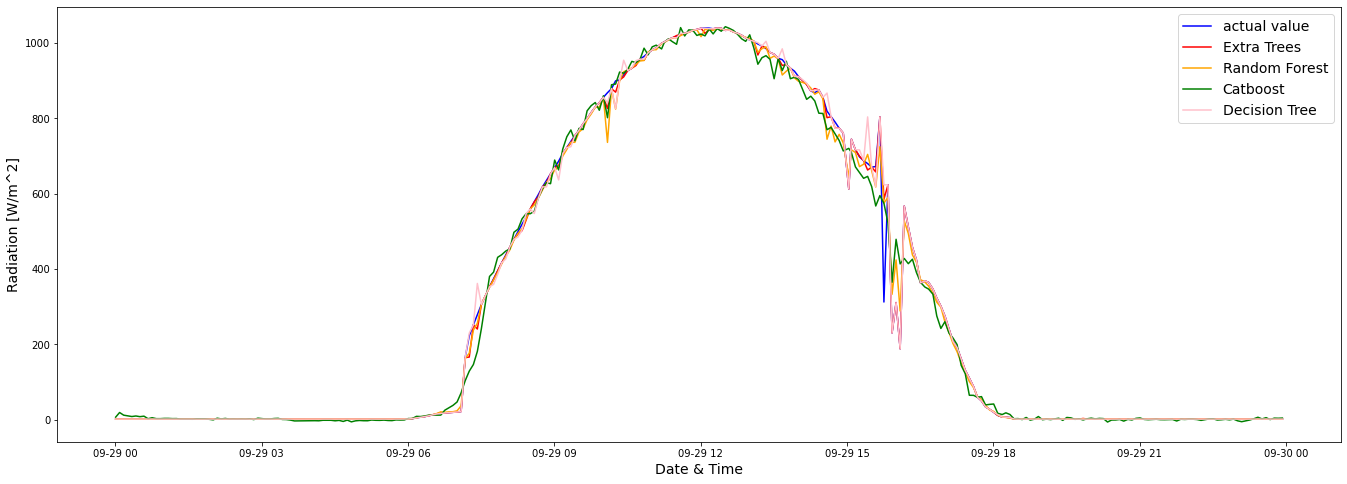

In [46]:
X_1 = data.loc['2016-9-29':'2016-9-30',:]
X_one = X.loc['2016-9-29':'2016-9-30',:]
y_one_randomforest = Randomforest.predict(X_one)
y_one_catboost = Catboost.predict(X_one)
y_one_decisiontr = DecisionTr.predict(X_one)
y_one_extratrees = Extratrees.predict(X_one)

fig, ax = plt.subplots(figsize = (23,8))


ax.plot(X_1.Radiation,'-', markerfacecolor='w',color='blue',label = 'actual value')
ax.plot(X_1.index, y_one_extratrees,'-',markerfacecolor='w', linewidth = 1.5, color = 'red', label = 'Extra Trees')
ax.plot(X_1.index, y_one_randomforest,'-',markerfacecolor='w', linewidth = 1.5, color = 'orange', label = 'Random Forest')
ax.plot(X_1.index, y_one_catboost,'-',markerfacecolor='w', linewidth = 1.5, color = 'green', label = 'Catboost')
ax.plot(X_1.index, y_one_decisiontr,'-',markerfacecolor='w', linewidth = 1.5, color = 'pink', label = 'Decision Tree')

ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.set_xlabel('Date & Time', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()



/root/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1069: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


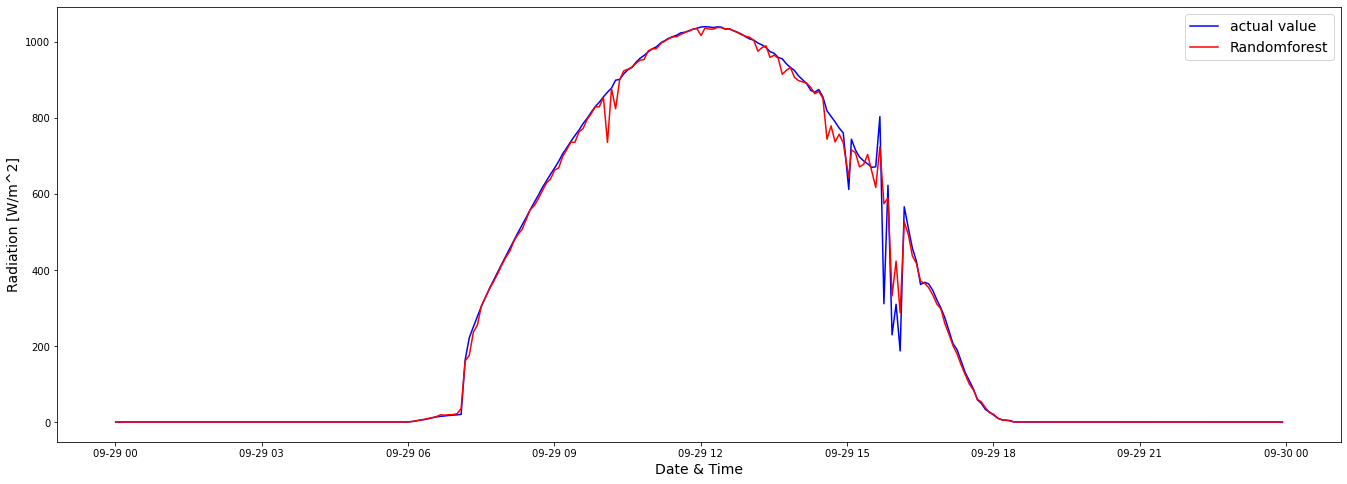

In [47]:
X_1 = data.loc['2016-9-29':'2016-9-30',:]
X_one = X.loc['2016-9-29':'2016-9-30',:]
y_one_extratrees = Randomforest.predict(X_one)


fig, ax = plt.subplots(figsize = (23,8))


ax.plot(X_1.Radiation,'-', markerfacecolor='w',color='blue',label = 'actual value')
ax.plot(X_1.index, y_one_extratrees,'-',markerfacecolor='w', linewidth = 1.5, color = 'red', label = 'Randomforest')

ax.set_ylabel('Radiation [W/m^2]', fontsize = 14)
ax.set_xlabel('Date & Time', fontsize = 14)
ax.legend(fontsize = 14)

plt.show()



In [48]:
print(max(data.Radiation))

1601.26


In [49]:
X_train,X_test,z_train,z_test = train_test_split(X,z,test_size=valid_size,random_state=seed)

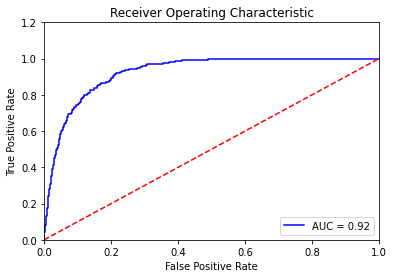

In [50]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, z_train)
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(z_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

